In [78]:
import os
import sys

### INIT DJANGO-GEO-SPAAS
src_dir = os.getcwd().split('nansat-lectures')[0]
os.environ['DJANGO_SETTINGS_MODULE'] = 'project.settings'
sys.path.insert(0, os.path.join(src_dir, 'django-geo-spaas', 'project'))
import django
django.setup()

In [79]:
import matplotlib.pyplot as plt
import numpy as np

from django.utils import timezone
from django.contrib.gis.geos import WKTReader

from nansat import Nansat, Domain, NSR
from geospaas.catalog.models import Dataset, DatasetURI
%matplotlib notebook

In [80]:
# find GlobCurrent data
gc_datasets = Dataset.objects.filter(entry_title__contains='globcurrent',
                                 time_coverage_start__gt=timezone.datetime(2014,1,1,tzinfo=timezone.utc))

In [81]:
print len(gc_datasets)

0


In [76]:
n = Nansat(gc_datasets[0].dataseturi_set.all()[0].uri)
d = Domain(NSR().wkt, '-te -90 10 -60 45 -tr 0.125 0.125')
n.reproject(d, addmask=False)

IndexError: list index out of range

In [ ]:
u = n['eastward_geostrophic_current_velocity']
v = n['northward_geostrophic_current_velocity']

In [82]:
# Search for drifters in the same region
geometry = WKTReader().read(n.get_border_wkt(nPoints=1000))
drifters = Dataset.objects.filter(entry_title__contains='drifter',
                                  geographic_location__geometry__intersects=geometry,
                                  time_coverage_start__lt=gc.time_coverage_start,
                                  time_coverage_end__gt=gc.time_coverage_end)
print len(drifters)

NameError: name 'gc' is not defined

<IPython.core.display.Javascript object>


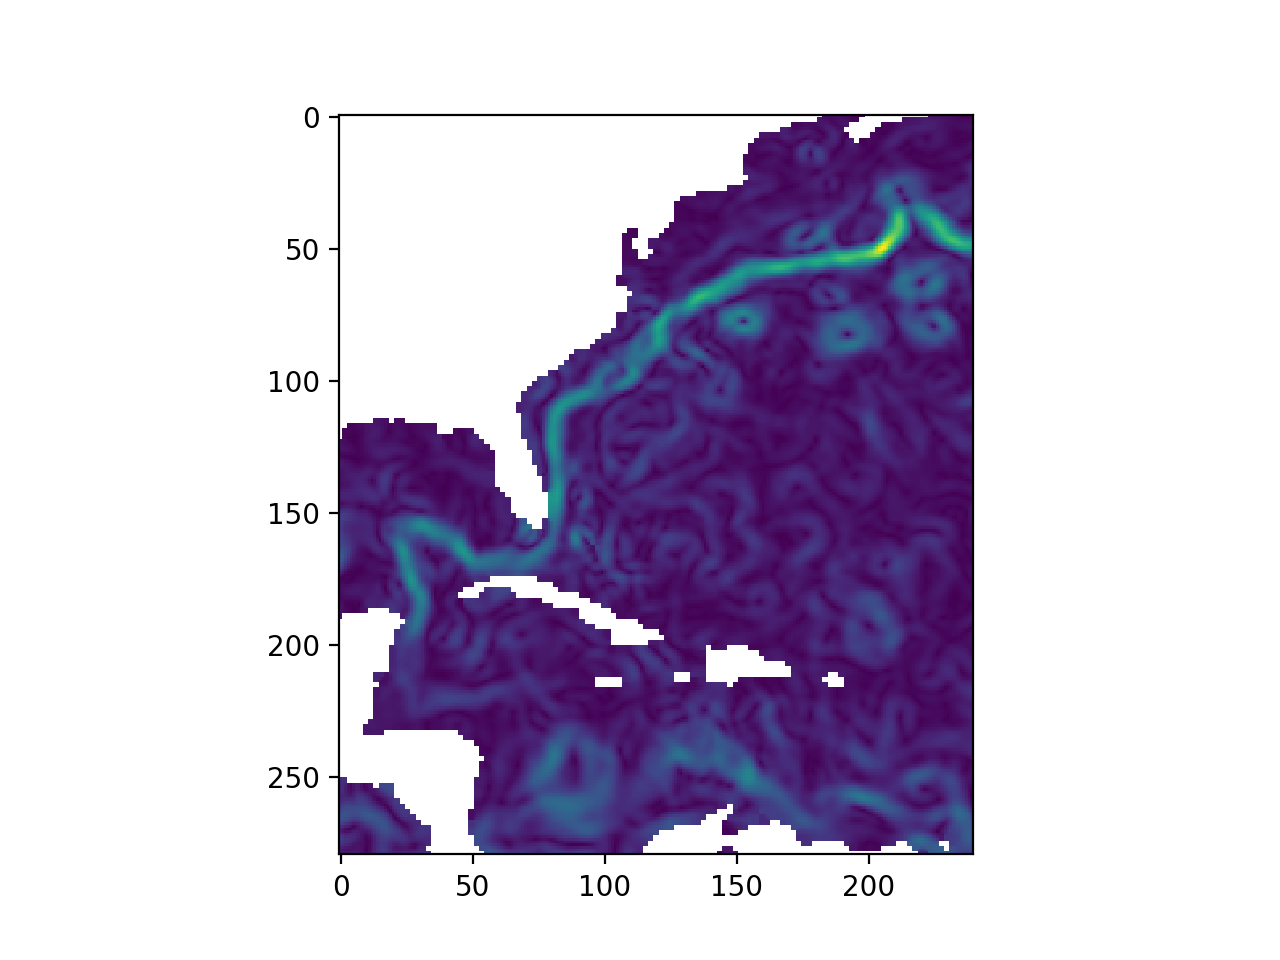

In [46]:
plt.figure()
plt.imshow(np.hypot(u, v))